In [ ]:
#https://dev.meteostat.net/formats.html#time-format

In [178]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from meteostat import Hourly
from datetime import datetime, timedelta, date
import missingno as msno
pd.set_option('display.max_columns',None)

In [150]:
start = datetime(2017,1,1)
end = datetime(2022,11,1,23,59)

data = Hourly('10729', start, end)
data = data.fetch()

df = data.reset_index()

In [151]:
df

time  temp  dwpt  rhum  prcp  snow   wdir  wspd  wpgt  \
0     2017-01-01 00:00:00  -3.6  -3.9  98.0   0.0   NaN  150.0   6.5   NaN   
1     2017-01-01 01:00:00  -3.8  -3.9  99.0   0.0   NaN  140.0   7.9   NaN   
2     2017-01-01 02:00:00  -3.4  -3.5  99.0   0.0   NaN  140.0   7.2   NaN   
3     2017-01-01 03:00:00  -3.4  -3.5  99.0   0.0   NaN  160.0   6.5   NaN   
4     2017-01-01 04:00:00  -3.5  -3.6  99.0   0.0   NaN  150.0   5.4   NaN   
...                   ...   ...   ...   ...   ...   ...    ...   ...   ...   
51139 2022-11-01 19:00:00  11.4   8.3  81.0   0.0   0.0  140.0   6.8  11.0   
51140 2022-11-01 20:00:00  10.9   8.1  83.0   0.0   0.0  140.0   7.6  13.0   
51141 2022-11-01 21:00:00  10.3   8.2  87.0   0.0   0.0  140.0   7.9  13.0   
51142 2022-11-01 22:00:00  10.1   8.2  88.0   0.0   0.0  150.0  10.4  15.0   
51143 2022-11-01 23:00:00  10.3   7.9  85.0   0.0   0.0  150.0  10.4  16.0   

         pres  tsun  coco  
0      1030.1   NaN   NaN  
1      1029.3   NaN   NaN  
2      1028.6   NaN   NaN  
3      1028.1   0.0   NaN  
4      1027.4   0.0   NaN  
...       ...   ...   ...  
51139  1022.1   0.0   1.0  
51140  1022.0   0.0   1.0  
51141  1022.6   0.0   1.0  
51142  1022.9   0.0   4.0  
51143  1022.8   0.0   4.0  

[51144 rows x 12 columns]

In [152]:
px.line(df,'time','prcp')

<AxesSubplot:xlabel='coco', ylabel='temp'>

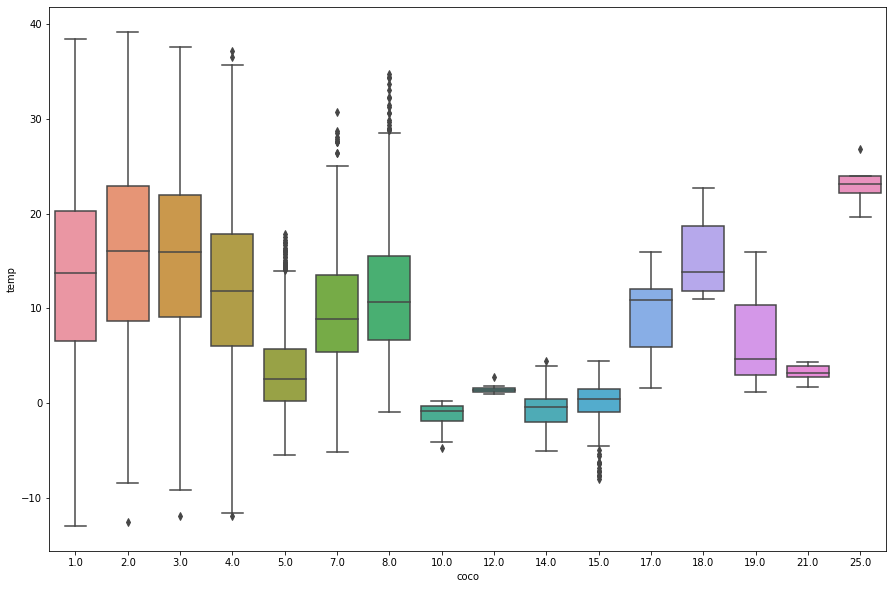

In [153]:
fig, ax = plt.subplots(1, figsize=(15, 10))
sns.boxplot(data=df, x='coco', y='temp')

<AxesSubplot:xlabel='coco', ylabel='rhum'>

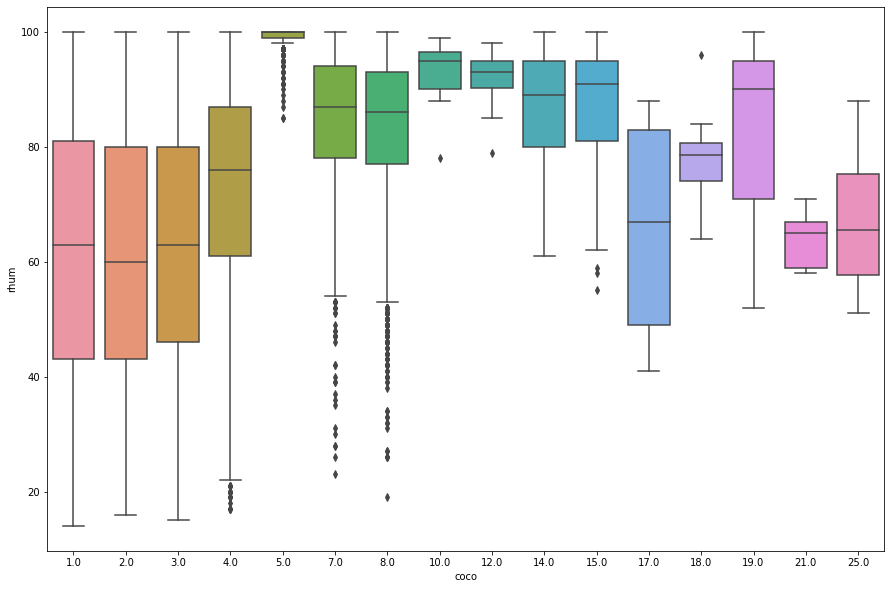

In [154]:
fig, ax = plt.subplots(1, figsize=(15, 10))
sns.boxplot(data=df, x='coco', y='rhum')

<AxesSubplot:xlabel='coco', ylabel='pres'>

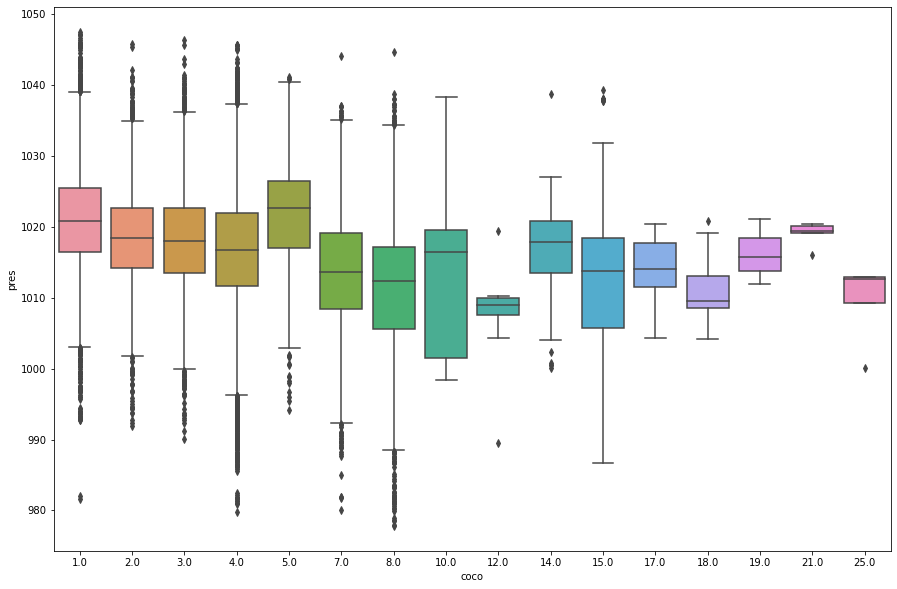

In [155]:
fig, ax = plt.subplots(1, figsize=(15, 10))
sns.boxplot(data=df, x='coco', y='pres')

In [159]:
# spalte für das Wetter in der nächsten Stunde
# Wetter = Niederschlag + Sonne + Condition + snow

df['time+60'] = df.time+timedelta(minutes=60)
df

time  temp  dwpt  rhum  prcp  snow   wdir  wspd  wpgt  \
0     2017-01-01 00:00:00  -3.6  -3.9  98.0   0.0   NaN  150.0   6.5   NaN   
1     2017-01-01 01:00:00  -3.8  -3.9  99.0   0.0   NaN  140.0   7.9   NaN   
2     2017-01-01 02:00:00  -3.4  -3.5  99.0   0.0   NaN  140.0   7.2   NaN   
3     2017-01-01 03:00:00  -3.4  -3.5  99.0   0.0   NaN  160.0   6.5   NaN   
4     2017-01-01 04:00:00  -3.5  -3.6  99.0   0.0   NaN  150.0   5.4   NaN   
...                   ...   ...   ...   ...   ...   ...    ...   ...   ...   
51139 2022-11-01 19:00:00  11.4   8.3  81.0   0.0   0.0  140.0   6.8  11.0   
51140 2022-11-01 20:00:00  10.9   8.1  83.0   0.0   0.0  140.0   7.6  13.0   
51141 2022-11-01 21:00:00  10.3   8.2  87.0   0.0   0.0  140.0   7.9  13.0   
51142 2022-11-01 22:00:00  10.1   8.2  88.0   0.0   0.0  150.0  10.4  15.0   
51143 2022-11-01 23:00:00  10.3   7.9  85.0   0.0   0.0  150.0  10.4  16.0   

         pres  tsun  coco             time+60  
0      1030.1   NaN   NaN 2017-01-01 01:00:00  
1      1029.3   NaN   NaN 2017-01-01 02:00:00  
2      1028.6   NaN   NaN 2017-01-01 03:00:00  
3      1028.1   0.0   NaN 2017-01-01 04:00:00  
4      1027.4   0.0   NaN 2017-01-01 05:00:00  
...       ...   ...   ...                 ...  
51139  1022.1   0.0   1.0 2022-11-01 20:00:00  
51140  1022.0   0.0   1.0 2022-11-01 21:00:00  
51141  1022.6   0.0   1.0 2022-11-01 22:00:00  
51142  1022.9   0.0   4.0 2022-11-01 23:00:00  
51143  1022.8   0.0   4.0 2022-11-02 00:00:00  

[51144 rows x 13 columns]

In [190]:
df_weather_last_hour = df.merge(df, left_on=['time'], right_on=['time+60'],suffixes=['_now','_last_hour'])
#df_weather_last_hour = df_weather_last_hour[['time','temp','dwpt','rhum','pres','prcp_last_hour','tsun_last_hour','snow_last_hour','coco_last_hour']]
df_weather_last_hour

time_now  temp_now  dwpt_now  rhum_now  prcp_now  snow_now  \
0     2017-01-01 01:00:00      -3.8      -3.9      99.0       0.0       NaN   
1     2017-01-01 02:00:00      -3.4      -3.5      99.0       0.0       NaN   
2     2017-01-01 03:00:00      -3.4      -3.5      99.0       0.0       NaN   
3     2017-01-01 04:00:00      -3.5      -3.6      99.0       0.0       NaN   
4     2017-01-01 05:00:00      -3.3      -3.4      99.0       0.0       NaN   
...                   ...       ...       ...       ...       ...       ...   
51138 2022-11-01 19:00:00      11.4       8.3      81.0       0.0       0.0   
51139 2022-11-01 20:00:00      10.9       8.1      83.0       0.0       0.0   
51140 2022-11-01 21:00:00      10.3       8.2      87.0       0.0       0.0   
51141 2022-11-01 22:00:00      10.1       8.2      88.0       0.0       0.0   
51142 2022-11-01 23:00:00      10.3       7.9      85.0       0.0       0.0   

       wdir_now  wspd_now  wpgt_now  pres_now  tsun_now  coco_now  \
0         140.0       7.9       NaN    1029.3       NaN       NaN   
1         140.0       7.2       NaN    1028.6       NaN       NaN   
2         160.0       6.5       NaN    1028.1       0.0       NaN   
3         150.0       5.4       NaN    1027.4       0.0       NaN   
4         150.0       6.8       NaN    1026.8       0.0       NaN   
...         ...       ...       ...       ...       ...       ...   
51138     140.0       6.8      11.0    1022.1       0.0       1.0   
51139     140.0       7.6      13.0    1022.0       0.0       1.0   
51140     140.0       7.9      13.0    1022.6       0.0       1.0   
51141     150.0      10.4      15.0    1022.9       0.0       4.0   
51142     150.0      10.4      16.0    1022.8       0.0       4.0   

              time+60_now      time_last_hour  temp_last_hour  dwpt_last_hour  \
0     2017-01-01 02:00:00 2017-01-01 00:00:00            -3.6            -3.9   
1     2017-01-01 03:00:00 2017-01-01 01:00:00            -3.8            -3.9   
2     2017-01-01 04:00:00 2017-01-01 02:00:00            -3.4            -3.5   
3     2017-01-01 05:00:00 2017-01-01 03:00:00            -3.4            -3.5   
4     2017-01-01 06:00:00 2017-01-01 04:00:00            -3.5            -3.6   
...                   ...                 ...             ...             ...   
51138 2022-11-01 20:00:00 2022-11-01 18:00:00            10.6             7.7   
51139 2022-11-01 21:00:00 2022-11-01 19:00:00            11.4             8.3   
51140 2022-11-01 22:00:00 2022-11-01 20:00:00            10.9             8.1   
51141 2022-11-01 23:00:00 2022-11-01 21:00:00            10.3             8.2   
51142 2022-11-02 00:00:00 2022-11-01 22:00:00            10.1             8.2   

       rhum_last_hour  prcp_last_hour  snow_last_hour  wdir_last_hour  \
0                98.0             0.0             NaN           150.0   
1                99.0             0.0             NaN           140.0   
2                99.0             0.0             NaN           140.0   
3                99.0             0.0             NaN           160.0   
4                99.0             0.0             NaN           150.0   
...               ...             ...             ...             ...   
51138            82.0             0.0             0.0           170.0   
51139            81.0             0.0             0.0           140.0   
51140            83.0             0.0             0.0           140.0   
51141            87.0             0.0             0.0           140.0   
51142            88.0             0.0             0.0           150.0   

       wspd_last_hour  wpgt_last_hour  pres_last_hour  tsun_last_hour  \
0                 6.5             NaN          1030.1             NaN   
1                 7.9             NaN          1029.3             NaN   
2                 7.2             NaN          1028.6             NaN   
3                 6.5             NaN          1028.1             0.0   
4                 5.4   

In [191]:
# Veränderung zur letzten Stunde erfassen
# Wenn temp_now höher negativ
df_weather_last_hour['temp_diff']=df_weather_last_hour.temp_now - df_weather_last_hour.temp_last_hour
df_weather_last_hour['rhum_diff']=df_weather_last_hour.rhum_now - df_weather_last_hour.rhum_last_hour
df_weather_last_hour['pres_diff']=df_weather_last_hour.pres_now - df_weather_last_hour.pres_last_hour
df_weather_last_hour['dwpt_diff']=df_weather_last_hour.dwpt_now - df_weather_last_hour.dwpt_last_hour
df_weather = df_weather_last_hour[['time_now','temp_now','dwpt_now','rhum_now','pres_now','temp_diff','rhum_diff','pres_diff','dwpt_diff','tsun_now','prcp_now','snow_now','coco_now']]
df_weather

time_now  temp_now  dwpt_now  rhum_now  pres_now  temp_diff  \
0     2017-01-01 01:00:00      -3.8      -3.9      99.0    1029.3       -0.2   
1     2017-01-01 02:00:00      -3.4      -3.5      99.0    1028.6        0.4   
2     2017-01-01 03:00:00      -3.4      -3.5      99.0    1028.1        0.0   
3     2017-01-01 04:00:00      -3.5      -3.6      99.0    1027.4       -0.1   
4     2017-01-01 05:00:00      -3.3      -3.4      99.0    1026.8        0.2   
...                   ...       ...       ...       ...       ...        ...   
51138 2022-11-01 19:00:00      11.4       8.3      81.0    1022.1        0.8   
51139 2022-11-01 20:00:00      10.9       8.1      83.0    1022.0       -0.5   
51140 2022-11-01 21:00:00      10.3       8.2      87.0    1022.6       -0.6   
51141 2022-11-01 22:00:00      10.1       8.2      88.0    1022.9       -0.2   
51142 2022-11-01 23:00:00      10.3       7.9      85.0    1022.8        0.2   

       rhum_diff  pres_diff  dwpt_diff  tsun_now  prcp_now  snow_now  coco_now  
0            1.0       -0.8        0.0       NaN       0.0       NaN       NaN  
1            0.0       -0.7        0.4       NaN       0.0       NaN       NaN  
2            0.0       -0.5        0.0       0.0       0.0       NaN       NaN  
3            0.0       -0.7       -0.1       0.0       0.0       NaN       NaN  
4            0.0       -0.6        0.2       0.0       0.0       NaN       NaN  
...          ...        ...        ...       ...       ...       ...       ...  
51138       -1.0        0.2        0.6       0.0       0.0       0.0       1.0  
51139        2.0       -0.1       -0.2       0.0       0.0       0.0       1.0  
51140        4.0        0.6        0.1       0.0       0.0       0.0       1.0  
51141        1.0        0.3        0.0       0.0       0.0       0.0       4.0  
51142       -3.0       -0.1       -0.3       0.0       0.0       0.0       4.0  

[51143 rows x 13 columns]

In [192]:
df_weather['time_now_-60'] = df_weather.time_now - timedelta(minutes=60)
df_weather

/var/folders/hq/d18z7q_x3570dr_djp_9zfg80000gn/T/ipykernel_4113/1377531152.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



time_now  temp_now  dwpt_now  rhum_now  pres_now  temp_diff  \
0     2017-01-01 01:00:00      -3.8      -3.9      99.0    1029.3       -0.2   
1     2017-01-01 02:00:00      -3.4      -3.5      99.0    1028.6        0.4   
2     2017-01-01 03:00:00      -3.4      -3.5      99.0    1028.1        0.0   
3     2017-01-01 04:00:00      -3.5      -3.6      99.0    1027.4       -0.1   
4     2017-01-01 05:00:00      -3.3      -3.4      99.0    1026.8        0.2   
...                   ...       ...       ...       ...       ...        ...   
51138 2022-11-01 19:00:00      11.4       8.3      81.0    1022.1        0.8   
51139 2022-11-01 20:00:00      10.9       8.1      83.0    1022.0       -0.5   
51140 2022-11-01 21:00:00      10.3       8.2      87.0    1022.6       -0.6   
51141 2022-11-01 22:00:00      10.1       8.2      88.0    1022.9       -0.2   
51142 2022-11-01 23:00:00      10.3       7.9      85.0    1022.8        0.2   

       rhum_diff  pres_diff  dwpt_diff  tsun_now  prcp_now  snow_now  \
0            1.0       -0.8        0.0       NaN       0.0       NaN   
1            0.0       -0.7        0.4       NaN       0.0       NaN   
2            0.0       -0.5        0.0       0.0       0.0       NaN   
3            0.0       -0.7       -0.1       0.0       0.0       NaN   
4            0.0       -0.6        0.2       0.0       0.0       NaN   
...          ...        ...        ...       ...       ...       ...   
51138       -1.0        0.2        0.6       0.0       0.0       0.0   
51139        2.0       -0.1       -0.2       0.0       0.0       0.0   
51140        4.0        0.6        0.1       0.0       0.0       0.0   
51141        1.0        0.3        0.0       0.0       0.0       0.0   
51142       -3.0       -0.1       -0.3       0.0       0.0       0.0   

       coco_now        time_now_-60  
0           NaN 2017-01-01 00:00:00  
1           NaN 2017-01-01 01:00:00  
2           NaN 2017-01-01 02:00:00  
3           NaN 2017-01-01 03:00:00  
4           NaN 2017-01-01 04:00:00  
...         ...                 ...  
51138       1.0 2022-11-01 18:00:00  
51139       1.0 2022-11-01 19:00:00  
51140       1.0 2022-11-01 20:00:00  
51141       4.0 2022-11-01 21:00:00  
51142       4.0 2022-11-01 22:00:00  

[51143 rows x 14 columns]

In [193]:
df_weather=df_weather.merge(df_weather,left_on=['time_now'],right_on=['time_now_-60'],suffixes=['','_next_hour'])
df_weather[df_weather.time_now.dt.date== date(2020,8,1)]

time_now  temp_now  dwpt_now  rhum_now  pres_now  temp_diff  \
31391 2020-08-01 00:00:00      18.5      14.8      79.0    1014.0       -1.2   
31392 2020-08-01 01:00:00      19.3      16.0      81.0    1013.7        0.8   
31393 2020-08-01 02:00:00      19.0      13.0      68.0    1013.3       -0.3   
31394 2020-08-01 03:00:00      17.7      13.6      77.0    1013.3       -1.3   
31395 2020-08-01 04:00:00      18.5      13.1      71.0    1013.1        0.8   
31396 2020-08-01 05:00:00      19.3      13.9      71.0    1013.6        0.8   
31397 2020-08-01 06:00:00      22.7      13.5      56.0    1014.1        3.4   
31398 2020-08-01 07:00:00      24.0      13.5      52.0    1014.1        1.3   
31399 2020-08-01 08:00:00      26.4      13.5      45.0    1014.9        2.4   
31400 2020-08-01 09:00:00      28.4      12.3      37.0    1014.5        2.0   
31401 2020-08-01 10:00:00      30.4      14.5      38.0    1014.7        2.0   
31402 2020-08-01 11:00:00      29.4      13.6      38.0    1015.0       -1.0   
31403 2020-08-01 12:00:00      29.1      14.9      42.0    1014.0       -0.3   
31404 2020-08-01 13:00:00      29.9      14.8      40.0    1014.0        0.8   
31405 2020-08-01 14:00:00      29.8      15.9      43.0    1013.8       -0.1   
31406 2020-08-01 15:00:00      31.0      14.6      37.0    1013.1        1.2   
31407 2020-08-01 16:00:00      31.6      13.8      34.0    1012.6        0.6   
31408 2020-08-01 17:00:00      31.8      14.5      35.0    1012.0        0.2   
31409 2020-08-01 18:00:00      30.5      15.0      39.0    1011.9       -1.3   
31410 2020-08-01 19:00:00      26.8      15.2      49.0    1012.3       -3.7   
31411 2020-08-01 20:00:00      25.4      16.8      59.0    1012.5       -1.4   
31412 2020-08-01 21:00:00      24.5      16.5      61.0    1012.0       -0.9   
31413 2020-08-01 22:00:00      22.9      16.9      69.0    1011.8       -1.6   
31414 2020-08-01 23:00:00      23.1      16.9      68.0    1012.2        0.2   

       rhum_diff  pres_diff  dwpt_diff  tsun_now  prcp_now  snow_now  \
31391       11.0       -0.1        1.2       0.0       0.0       NaN   
31392        2.0       -0.3        1.2       0.0       0.0       NaN   
31393      -13.0       -0.4       -3.0       0.0       0.0       NaN   
31394        9.0        0.0        0.6       0.0       0.0       NaN   
31395       -6.0       -0.2       -0.5       0.0       0.0       NaN   
31396        0.0        0.5        0.8       7.0       0.0       NaN   
31397      -15.0        0.5       -0.4      52.0       0.0       NaN   
31398       -4.0        0.0        0.0      60.0       0.0       NaN   
31399       -7.0        0.8        0.0      52.0       0.0       NaN   
31400       -8.0       -0.4       -1.2      44.0       0.0       NaN   
31401        1.0        0.2        2.2      35.0       0.0       NaN   
31402        0.0        0.3       -0.9      15.0       0.0       NaN   
31403        4.0       -1.0        1.3       0.0       0.1       NaN   
31404       -2.0        0.0       -0.1       0.0       0.0       NaN   
31405        3.0       -0.2        1.1       7.0       0.0       NaN   
31406       -6.0       -0.7       -1.3      44.0       0.0       NaN   
31407       -3.0       -0.5       -0.8      60.0       0.0       NaN   
31408        1.0       -0.6        0.7      60.0       0.0       NaN   
31409        4.0       -0.1        0.5      46.0       0.0       NaN   
31410       10.0        0.4        0.2       0.0       0.0       NaN   
31411       10.0        0.2        1.6       0.0       0.0       NaN   
31412        2.0       -0.5       -0.3       0.0       0.0       NaN   
31413        8.0       -0.2        0.4       0.0       0.0       NaN   
31414       -1.0        0.4        0.0       0.0       0.0       NaN   

       coco_now        time_now_-60  time_now_next_hour  temp_now_next_hour  \
31391       1.0 2020-07-31 23:00:00 2020-08-01 01:00:00                19.3   
31392       1.0 2020-08-01 00:00:00 2020-08-01 02:00:00  

In [194]:
df_weather = df_weather[['time_now','temp_now','rhum_now','dwpt_now','pres_now',
'temp_diff','rhum_diff','dwpt_diff','pres_diff',
'tsun_now','prcp_now','snow_now','coco_now',
'tsun_now_next_hour','prcp_now_next_hour','snow_now_next_hour','coco_now_next_hour']]
df_weather

time_now  temp_now  rhum_now  dwpt_now  pres_now  temp_diff  \
0     2017-01-01 01:00:00      -3.8      99.0      -3.9    1029.3       -0.2   
1     2017-01-01 02:00:00      -3.4      99.0      -3.5    1028.6        0.4   
2     2017-01-01 03:00:00      -3.4      99.0      -3.5    1028.1        0.0   
3     2017-01-01 04:00:00      -3.5      99.0      -3.6    1027.4       -0.1   
4     2017-01-01 05:00:00      -3.3      99.0      -3.4    1026.8        0.2   
...                   ...       ...       ...       ...       ...        ...   
51137 2022-11-01 18:00:00      10.6      82.0       7.7    1021.9       -2.8   
51138 2022-11-01 19:00:00      11.4      81.0       8.3    1022.1        0.8   
51139 2022-11-01 20:00:00      10.9      83.0       8.1    1022.0       -0.5   
51140 2022-11-01 21:00:00      10.3      87.0       8.2    1022.6       -0.6   
51141 2022-11-01 22:00:00      10.1      88.0       8.2    1022.9       -0.2   

       rhum_diff  dwpt_diff  pres_diff  tsun_now  prcp_now  snow_now  \
0            1.0        0.0       -0.8       NaN       0.0       NaN   
1            0.0        0.4       -0.7       NaN       0.0       NaN   
2            0.0        0.0       -0.5       0.0       0.0       NaN   
3            0.0       -0.1       -0.7       0.0       0.0       NaN   
4            0.0        0.2       -0.6       0.0       0.0       NaN   
...          ...        ...        ...       ...       ...       ...   
51137       12.0       -0.3        0.6       0.0       0.0       0.0   
51138       -1.0        0.6        0.2       0.0       0.0       0.0   
51139        2.0       -0.2       -0.1       0.0       0.0       0.0   
51140        4.0        0.1        0.6       0.0       0.0       0.0   
51141        1.0        0.0        0.3       0.0       0.0       0.0   

       coco_now  tsun_now_next_hour  prcp_now_next_hour  snow_now_next_hour  \
0           NaN                 NaN                 0.0                 NaN   
1           NaN                 0.0                 0.0                 NaN   
2           NaN                 0.0                 0.0                 NaN   
3           NaN                 0.0                 0.0                 NaN   
4           NaN                 0.0                 0.0                 NaN   
...         ...                 ...                 ...                 ...   
51137       1.0                 0.0                 0.0                 0.0   
51138       1.0                 0.0                 0.0                 0.0   
51139       1.0                 0.0                 0.0                 0.0   
51140       1.0                 0.0                 0.0                 0.0   
51141       4.0                 0.0                 0.0                 0.0   

       coco_now_next_hour  
0                     NaN  
1                     NaN  
2                     NaN  
3                     NaN  
4                     NaN  
...                   ...  
51137                 1.0  
51138                 1.0  
51139                 1.0  
51140                 4.0  
51141                 4.0  

[51142 rows x 17 columns]

<AxesSubplot:>

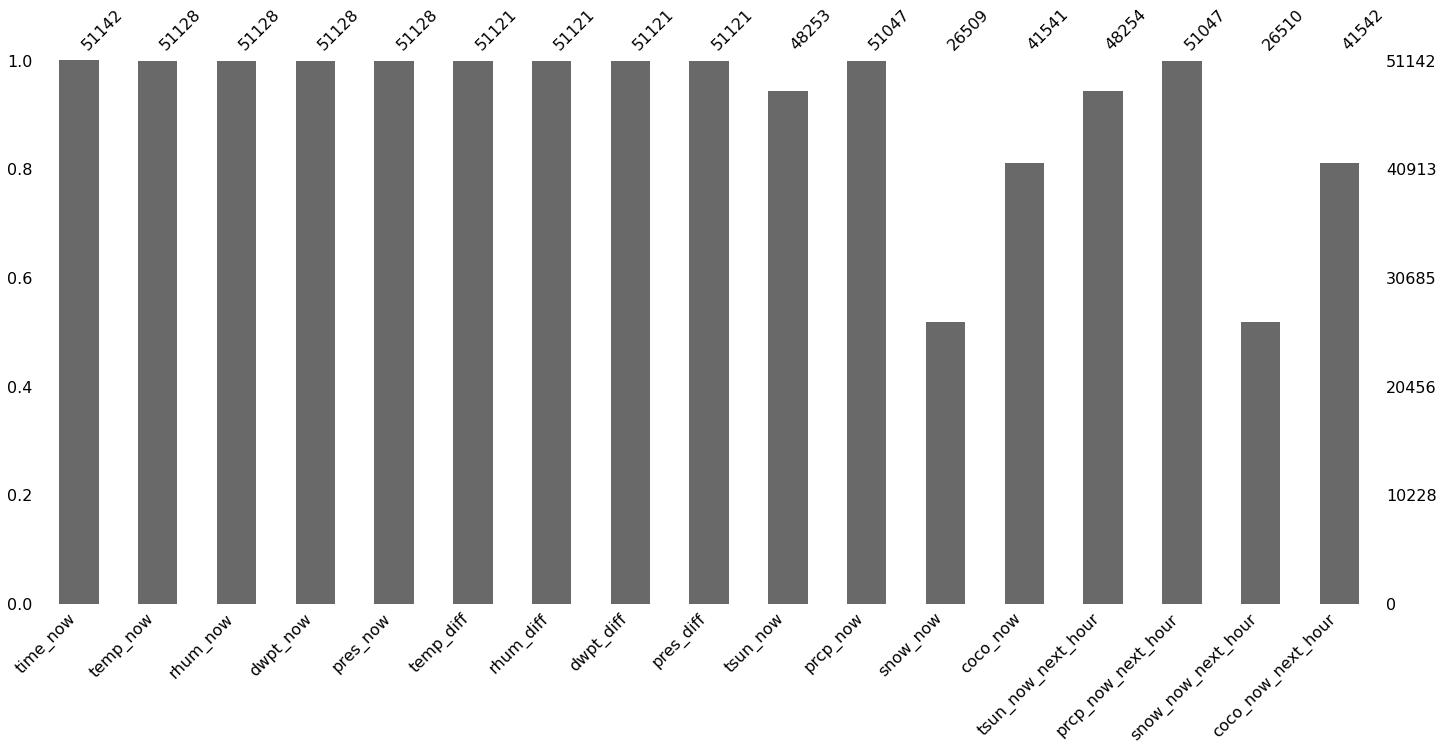

In [195]:
msno.bar(df_weather)

In [196]:
px.line(df_weather,'time_now','snow_now')

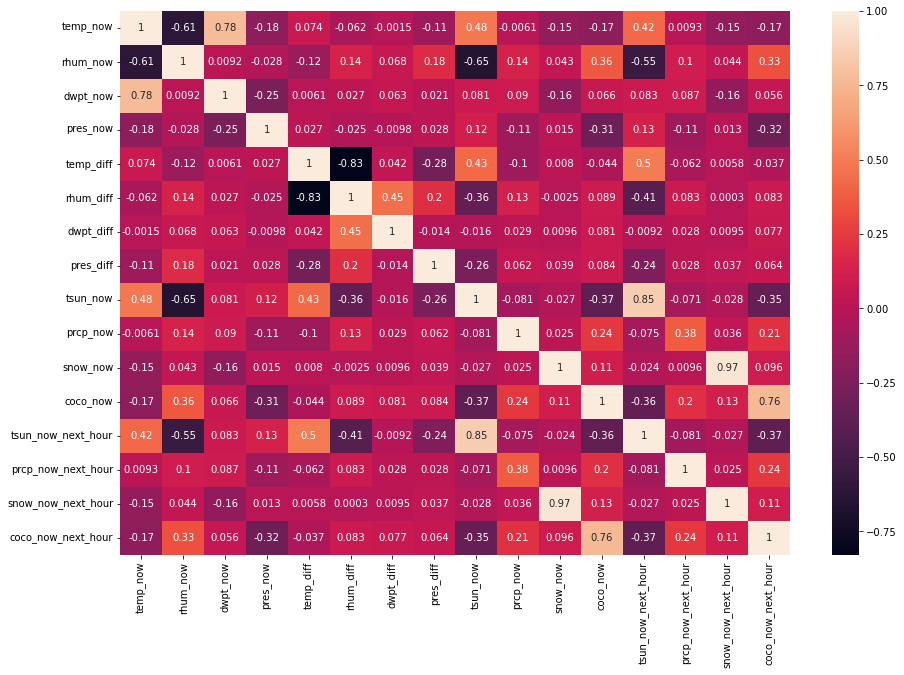

In [197]:
fig, ax = plt.subplots(1, figsize=(15, 10))
corr_matrix = df_weather.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

In [198]:
df_weather.to_pickle('weatherdata_raw')